### This function is used to replace integers with their string representation. ex: 45 as forty - five.

In [717]:


def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
            
        
    return new_words

In [718]:
df = pd.read_csv('grub_hub.csv')



In [719]:
reviews = df['REVIEW'].tolist()

## Cleaning all the reviews

In [ ]:
cleaned_data = []  

for i in range(len(reviews)):
    
    #removing all punctuation marks and things 
    #keeping single quotes for didn't wouldnt and all
    review = re.sub("[^a-zA-Z0-9'’]", " ", reviews[i])
    
    review = review.lower()
    
    review = review.split() 
    
    #replacing it with numbers
    review = replace_numbers(review)
    
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)
    
    
    #rejoining back everything in the split.
    cleaned_data.append(review) 

## Sentiment and subjectivity score of each review.

In [722]:
#sentiment and subjectivity score of each review processed using TextBlob.

sentiment_list = []
subjectivity_list = []
for i in range(len(cleaned_data)):
    # Create a TextBlob object
    obj = TextBlob(cleaned_data[i])

    #This returns a value between -1 and 1
    sentiment = obj.sentiment.polarity
    subjectivity = obj.sentiment.subjectivity
    sentiment_list.append(sentiment)
    subjectivity_list.append(subjectivity)


In [723]:
sentiment_list2 = pd.DataFrame(list(zip(sentiment_list,subjectivity_list)))
sentiment_list2.head()

,0,1
0,0.243750,0.698611
1,0.557222,0.792778
2,0.005682,0.437500
3,-0.166667,0.450000
4,-0.227083,0.677083


In [ ]:
senti_table = pd.concat([df,sentiment_list2],axis=1).rename(columns={ 0:"sentiment",1:"subjectivity"})

## PLOTS OF SENTIMENT AND SUBJECTIVITY

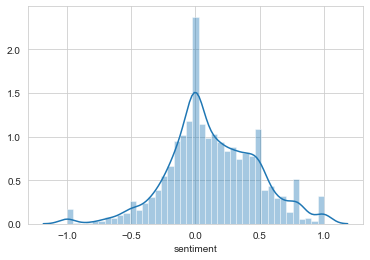

In [726]:
sns.distplot(senti_table['sentiment'])
#this plot show most of the reviews are positive according to textblob

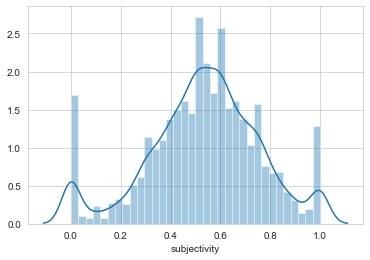

In [727]:
sns.distplot(senti_table['subjectivity'])
#if its closer to 0. it means its very objective expresses very less emotions
#if its closer to 1. it means its very subjective means expresses a lot of emotions feelings etc

## PLOTS OF RATING

In [728]:
#getting only the ratings from the review.

Ratings = df['RATING'].tolist()

Ratings_r = []

for i in range(len(Ratings)):
    Ratings_r.append(Ratings[i].split()[0])
    

In [729]:
rating_table = pd.DataFrame(Ratings_r)
senti_table = pd.concat([senti_table,rating_table],axis=1).rename(columns={ 0:"Rating"})

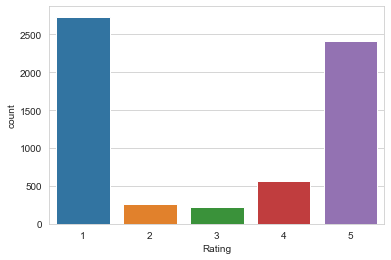

In [730]:
sns.countplot(senti_table['Rating'])
#our countplot tells the same story

In [731]:
datetime = senti_table['DATETIME'].tolist()

In [732]:
#getting the datetime values of all the reviews

senti_table['YEAR'] = senti_table['DATETIME'].apply(lambda x: x[0:4])
senti_table['MONTH'] = senti_table['DATETIME'].apply(lambda x: x[5:7])
senti_table['DAY'] = senti_table['DATETIME'].apply(lambda x: x[8:10])

In [733]:
senti_table['YEAR'] = senti_table['YEAR'].astype('int')
senti_table['Rating'] = senti_table['Rating'].astype('int')

# REVIEWS OVER THE YEARS WITH THEIR MEAN RATINGS

Text(0.5, 1.0, 'Stars per year')

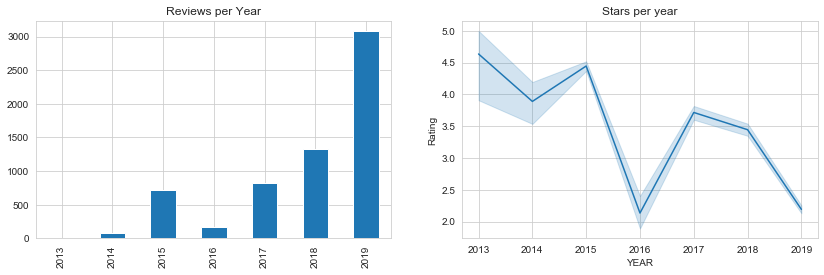

In [734]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
senti_table.YEAR.value_counts().sort_index().plot.bar(title='Reviews per Year', ax=axes[0]);
sns.lineplot(x='YEAR', y='Rating', data=senti_table, ax=axes[1])
axes[1].set_title('Stars per year')

#stars were usually positive but it went downhill later..
#reviews are turning more negative gradually for grubhub

In [735]:
senti_table['VERIFIED_BOOL'].value_counts()

0    3385
1    2815
Name: VERIFIED_BOOL, dtype: int64

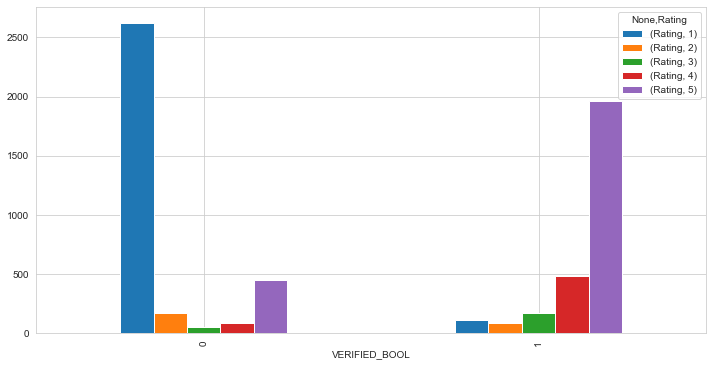

In [736]:
senti_table.groupby(["VERIFIED_BOOL","Rating"]).agg({'Rating':'count'}).unstack().plot(kind='bar', figsize=(12,6))

#this shows most of the people who were invited gave a positive rating but most who were not gave a negative rating
#it means most reviews can be fake.

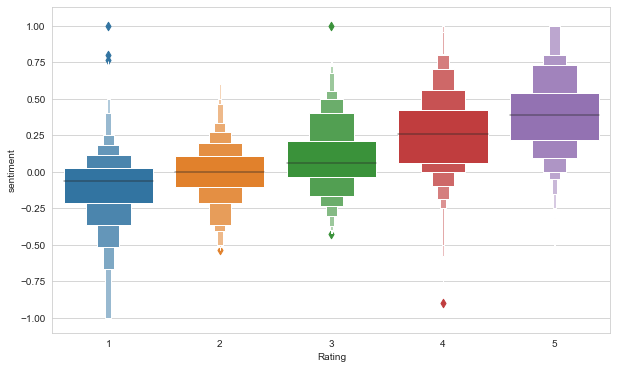

In [737]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Rating', y='sentiment', data=senti_table)
plt.show();

#it means textblob is working as good as we could expect it to be..

#the sentiment are in thus aligned with the ratings.

#it means we can use the textblob on the facebook data as well.

In [738]:
#giving a sentiment _ label: 1 = Positive, 0 = Neutral and -1 = Negative.

def sentiment_label(x):
    if x>0.10:
        sentiment_label = 1
        
    elif x < 0.00:
        sentiment_label = -1
        
    else:
        sentiment_label = 0
        
    return sentiment_label

In [739]:
senti_table['sentiment_label'] = senti_table['sentiment'].apply(lambda x: sentiment_label(x))

# FUNCTIONS TO GET THE MOST COMMON WORD, BIGRAM AND TRIGRAM FOR POSITIVE , NEGATIVE AND NEUTRAL REVIEWS

In [792]:
#all the function below are used to get the most frequent words, bigrams and trigrams according to the sentiment desired.


def get_words(sentiment):
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'REVIEW'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    count_each_word = Counter(clean_tokens)
    print(count_each_word.most_common(100))
            

def get_bigrams(sentiment):
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'REVIEW'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    bgs = nltk.bigrams(clean_tokens)
    
    fdist = nltk.FreqDist(bgs)
    print(fdist.most_common(50))
    
    
def get_trigrams(sentiment):
    
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'REVIEW'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    bgs = nltk.trigrams(clean_tokens)
    
    fdist = nltk.FreqDist(bgs)
    print(fdist.most_common(50))
    
def get_ngrams(sentiment,grams):
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'REVIEW'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    bgs = nltk.ngrams(clean_tokens,grams)
    
    fdist = nltk.FreqDist(bgs)
    print(fdist.most_common(50))
    
def get_clean_bigrams(sentiment):
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'cleaned_lemma_review'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    bgs = nltk.bigrams(clean_tokens)
    
    fdist = nltk.FreqDist(bgs)
    print(fdist.most_common(50))
    
def get_clean_trigrams(sentiment):
    
    reviews = senti_table.loc[senti_table['sentiment_label'] == sentiment ,'cleaned_lemma_review'].tolist()
    clean_tokens = []
    for i in range(len(reviews)):
        k = reviews[i].split()
        for j in k:
            clean_tokens.append(j)
            
    bgs = nltk.trigrams(clean_tokens)
    
    fdist = nltk.FreqDist(bgs)
    print(fdist.most_common(50))

    

In [742]:
get_bigrams(1)

[(('I', 'have'), 335), (('I', 'love'), 251), (('and', 'the'), 248), (('and', 'I'), 237), (('customer', 'service'), 224), (('of', 'the'), 219), (('easy', 'to'), 216), (('the', 'restaurant'), 180), (('to', 'order'), 178), (('I', 'was'), 178), (('the', 'food'), 175), (('to', 'use'), 167), (('on', 'the'), 166), (('my', 'order'), 161), (('Grubhub', 'is'), 159), (('in', 'the'), 158), (('my', 'food'), 154), (('to', 'get'), 153), (('is', 'a'), 149), (('and', 'they'), 148), (('for', 'the'), 141), (('I', 'will'), 138), (('to', 'be'), 133), (('the', 'delivery'), 128), (('I', 'would'), 128), (('it', 'was'), 127), (('I', 'am'), 125), (('to', 'the'), 124), (('the', 'driver'), 121), (('the', 'order'), 120), (('have', 'to'), 118), (('with', 'the'), 117), (('on', 'time'), 117), (('when', 'I'), 117), (('have', 'a'), 116), (('service', 'is'), 115), (('that', 'I'), 115), (('a', 'great'), 113), (('I', 'had'), 110), (('food', 'was'), 107), (('I', 'ordered'), 107), (('for', 'a'), 107), (('order', 'from'), 10

In [743]:
get_bigrams(-1)

[(('my', 'order'), 488), (('customer', 'service'), 460), (('and', 'they'), 451), (('the', 'restaurant'), 432), (('the', 'driver'), 407), (('my', 'food'), 384), (('I', 'called'), 372), (('I', 'was'), 367), (('the', 'food'), 365), (('it', 'was'), 363), (('the', 'order'), 351), (('I', 'have'), 325), (('I', 'ordered'), 324), (('and', 'I'), 322), (('I', 'will'), 305), (('and', 'the'), 299), (('on', 'the'), 291), (('an', 'hour'), 286), (('to', 'be'), 273), (('food', 'was'), 271), (('order', 'was'), 269), (('for', 'the'), 260), (('to', 'get'), 259), (('I', 'had'), 255), (('of', 'the'), 251), (('to', 'the'), 250), (('in', 'the'), 234), (('for', 'a'), 230), (('had', 'to'), 206), (('will', 'never'), 189), (('order', 'from'), 189), (('order', 'and'), 182), (('grub', 'hub'), 182), (('called', 'the'), 180), (('that', 'the'), 178), (('that', 'I'), 177), (('I', 'would'), 177), (('and', 'it'), 174), (('did', 'not'), 173), (('me', 'a'), 172), (('told', 'me'), 168), (('when', 'I'), 167), (('they', 'said

In [744]:
get_trigrams(1)

[(('on', 'time', 'and'), 67), (('to', 'use', 'and'), 60), (('easy', 'to', 'use'), 59), (('customer', 'service', 'is'), 45), (('I', 'love', 'the'), 43), (('I', 'have', 'had'), 38), (('the', 'food', 'is'), 38), (('I', 'had', 'to'), 37), (('customer', 'service', 'and'), 36), (('is', 'a', 'great'), 36), (('my', 'order', 'was'), 36), (('the', 'restaurant', 'and'), 35), (('I', 'will', 'never'), 34), (('a', 'lot', 'of'), 34), (('the', 'first', 'time'), 33), (('easy', 'to', 'use.'), 33), (('is', 'easy', 'to'), 32), (('and', 'easy', 'to'), 32), (('the', 'food', 'was'), 31), (('a', 'problem', 'with'), 31), (('the', 'order', 'was'), 30), (('Grub', 'hub', 'is'), 29), (('restaurants', 'to', 'choose'), 28), (('to', 'order', 'food'), 28), (('I', 'have', 'to'), 27), (('I', 'ordered', 'from'), 27), (('I', 'have', 'been'), 26), (('and', 'the', 'delivery'), 26), (('and', 'the', 'food'), 26), (('being', 'able', 'to'), 25), (('and', 'I', 'have'), 25), (('an', 'issue', 'with'), 25), (('placed', 'an', 'order

In [745]:
get_trigrams(-1)

[(('I', 'will', 'never'), 138), (('I', 'called', 'the'), 128), (('I', 'had', 'to'), 113), (('will', 'never', 'use'), 104), (('my', 'order', 'was'), 97), (('an', 'hour', 'and'), 97), (('called', 'the', 'restaurant'), 96), (('the', 'restaurant', 'and'), 96), (('and', 'they', 'said'), 85), (('over', 'an', 'hour'), 84), (('the', 'food', 'was'), 83), (('and', 'a', 'half'), 79), (('the', 'order', 'was'), 76), (('customer', 'service', 'and'), 72), (('hour', 'and', 'a'), 71), (('placed', 'an', 'order'), 69), (('I', 'placed', 'an'), 66), (('I', 'was', 'told'), 62), (('my', 'food', 'was'), 62), (('I', 'ordered', 'from'), 62), (('If', 'I', 'could'), 60), (('I', 'could', 'give'), 60), (('my', 'order', 'and'), 60), (('to', 'pick', 'up'), 60), (('on', 'the', 'phone'), 58), (('and', 'it', 'was'), 57), (('the', 'customer', 'service'), 55), (('it', 'would', 'be'), 51), (('give', 'me', 'a'), 51), (('my', 'food', 'and'), 50), (('that', 'my', 'order'), 50), (('they', 'told', 'me'), 47), (('the', 'order', 

In [746]:
get_bigrams(0)

[(('the', 'restaurant'), 217), (('the', 'driver'), 203), (('I', 'was'), 186), (('my', 'order'), 174), (('of', 'the'), 173), (('the', 'order'), 173), (('customer', 'service'), 159), (('I', 'have'), 157), (('and', 'they'), 153), (('on', 'the'), 146), (('the', 'food'), 145), (('it', 'was'), 141), (('I', 'called'), 139), (('to', 'the'), 137), (('and', 'I'), 133), (('and', 'the'), 132), (('to', 'be'), 128), (('my', 'food'), 126), (('for', 'the'), 125), (('in', 'the'), 121), (('I', 'had'), 117), (('order', 'was'), 115), (('to', 'get'), 114), (('that', 'I'), 111), (('I', 'will'), 107), (('I', 'ordered'), 106), (('for', 'a'), 98), (('I', 'would'), 98), (('the', 'delivery'), 92), (('with', 'the'), 92), (('have', 'to'), 90), (('that', 'the'), 89), (('had', 'to'), 88), (('order', 'and'), 87), (('told', 'me'), 85), (('to', 'my'), 85), (('an', 'hour'), 83), (('when', 'I'), 83), (('me', 'a'), 80), (('and', 'it'), 78), (('to', 'order'), 77), (('I', 'am'), 74), (('did', 'not'), 74), (('my', 'money'), 

In [747]:
get_trigrams(0)

[(('I', 'had', 'to'), 46), (('the', 'restaurant', 'and'), 46), (('I', 'called', 'the'), 44), (('my', 'order', 'was'), 43), (('I', 'will', 'never'), 34), (('I', 'was', 'told'), 31), (('the', 'order', 'was'), 30), (('called', 'the', 'restaurant'), 29), (('the', 'customer', 'service'), 28), (('give', 'me', 'a'), 27), (('and', 'was', 'told'), 27), (('and', 'they', 'said'), 26), (('told', 'me', 'that'), 26), (('to', 'pick', 'up'), 26), (('over', 'an', 'hour'), 26), (('my', 'order', 'and'), 25), (('I', 'placed', 'an'), 25), (('and', 'it', 'was'), 24), (('placed', 'an', 'order'), 24), (('the', 'driver', 'was'), 24), (('the', 'order', 'and'), 24), (('I', 'would', 'have'), 23), (('customer', 'service', 'and'), 22), (('will', 'never', 'use'), 22), (('I', 'ordered', 'from'), 22), (('that', 'the', 'driver'), 22), (('pick', 'up', 'the'), 21), (('on', 'the', 'phone'), 21), (('my', 'food', 'and'), 20), (('my', 'money', 'back'), 20), (('the', 'food', 'was'), 20), (('I', 'have', 'to'), 20), (('to', 'ge

In [748]:
#next step maybe make a bag of words for specific topics like delivery, customer service, driver, food, money
#and see the sentiments accordingly..

#remove step words , lemmization and again get bigrams and trigrams..

#main aim is to get insights for the company.. so can keep it as simple as possible

sr = stopwords.words('english')
sr.remove("wasn't")
sr.remove("not")
sr.remove("haven't")

cleaned_data_2 = cleaned_data

In [749]:
outer_list = []
inner_list = []
for i in range(len(cleaned_data)):
    tokens = tknzr.tokenize(cleaned_data[i])
    outer_list.append(tokens)
    

In [763]:
clean_tokens = []

for i in outer_list:
    for k in i:
        clean_tokens.append(k)
        
len(clean_tokens)

190340

In [752]:
count_each_word = Counter(clean_tokens)
print(count_each_word.most_common(100))

[('order', 5320), ('food', 4504), ('grubhub', 4098), ('service', 3141), ('not', 3124), ('time', 2493), ('delivery', 2463), ('never', 2100), ('driver', 1815), ('restaurant', 1754), ('customer', 1721), ('use', 1685), ('get', 1612), ('would', 1503), ('ordered', 1348), ('one', 1318), ('called', 1260), ('two', 1179), ('said', 1173), ('grub', 1098), ('hub', 1048), ('refund', 1039), ('delivered', 994), ('great', 937), ('told', 927), ('minutes', 869), ('call', 865), ('even', 844), ('money', 843), ('five', 822), ('got', 818), ('app', 776), ('hour', 773), ('restaurants', 753), ('back', 742), ('always', 734), ('could', 725), ('give', 716), ('first', 703), ('three', 694), ('times', 685), ('like', 662), ('ten', 659), ('hours', 651), ('good', 646), ('love', 603), ('using', 591), ('ever', 591), ('easy', 586), ('company', 572), ('ordering', 565), ('experience', 557), ('still', 557), ('drivers', 550), ('deliver', 543), ('received', 540), ('orders', 535), ('late', 515), ('way', 512), ('cold', 511), ('ph

# WORDCLOUDS OF THE MOST COMMON WORDS

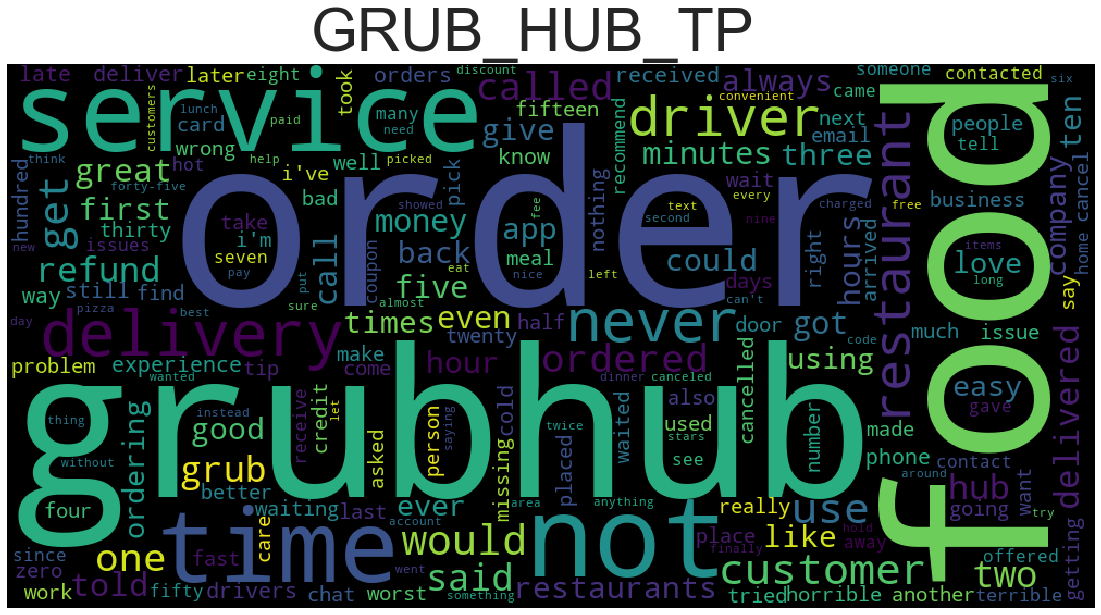

In [753]:
from wordcloud import WordCloud
word_could_dict=Counter(clean_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"GRUB_HUB_TP", fontsize=60, ha='center')
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [800]:
nlp = spacy.load('en')

In [755]:
def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp("".join(sent)) 
        for token in doc:
            texts_out.append(token.lemma_)
    return texts_out


In [756]:
lemmatization(["hello","what is happening","godly"])
        

['hello', 'what', 'be', 'happen', 'godly']

# SEGMENTING MAJOR BUSINESS OPERATIONS REVIEWS BY THEIR MOST COMMONLY ASSOCIATED WORDS.

# FOR EACH SEGMENT , PLOTTING THEIR WORDCOUNT TO GET THE MOST COMMON INSIGHTS OF THEIR OPERATIONS

## some examples of the most common word for each category

### food - cold, quality, tasty, miss, restautant, 

### delivery - time, wait , terrible, driver, contact, minute, hour, late, later

### customer_center/service - call, refund, 'cancel order', email, credit, coupon,issue, charge, service, business

### driver - rude, lie, communication, english, arrival, gentle.
 


In [783]:
clean_lemmatized_reviews = []
for i in range(len(outer_list_2)):
    clean_lemmatized_reviews.append(" ".join(outer_list_2[i]))

In [787]:
senti_table['cleaned_lemma_review'] = clean_lemmatized_reviews

In [790]:
get_clean_bigrams(1)

[(('grub', 'hub'), 370), (('customer', 'service'), 358), (('use', 'grubhub'), 244), (('easy', 'use'), 176), (('order', 'food'), 169), (('great', 'service'), 152), (('love', 'grubhub'), 148), (('order', 'grubhub'), 115), (('first', 'time'), 103), (('get', 'food'), 100), (('place', 'order'), 95), (('grubhub', 'great'), 92), (('delivery', 'time'), 87), (('food', 'deliver'), 78), (('time', 'order'), 77), (('easy', 'order'), 69), (('delivery', 'service'), 68), (('delivery', 'fee'), 68), (('use', 'grub'), 65), (('service', 'great'), 64), (('food', 'delivery'), 63), (('food', 'arrive'), 62), (('use', 'service'), 62), (('good', 'service'), 60), (('time', 'use'), 58), (('cancel', 'order'), 58), (('make', 'order'), 58), (('great', 'food'), 57), (('food', 'always'), 55), (('call', 'restaurant'), 55), (('never', 'use'), 55), (('great', 'customer'), 51), (('make', 'sure'), 50), (('deliver', 'food'), 49), (('grubhub', 'order'), 49), (('grubhub', 'make'), 49), (('two', 'hour'), 48), (('great', 'exper

In [791]:
get_clean_bigrams(-1)

[(('customer', 'service'), 738), (('grub', 'hub'), 462), (('order', 'food'), 274), (('two', 'hour'), 269), (('use', 'grubhub'), 265), (('never', 'use'), 252), (('cancel', 'order'), 234), (('place', 'order'), 227), (('call', 'restaurant'), 200), (('get', 'food'), 185), (('order', 'grubhub'), 182), (('delivery', 'service'), 157), (('forty', 'five'), 154), (('not', 'use'), 150), (('time', 'order'), 146), (('first', 'time'), 140), (('five', 'minute'), 137), (('call', 'grubhub'), 132), (('use', 'service'), 128), (('delivery', 'time'), 127), (('call', 'customer'), 126), (('deliver', 'food'), 124), (('order', 'cancel'), 121), (('food', 'never'), 120), (('next', 'order'), 113), (('food', 'cold'), 109), (('never', 'get'), 109), (('bad', 'experience'), 106), (('refund', 'money'), 99), (('zero', 'star'), 99), (('service', 'ever'), 99), (('never', 'order'), 97), (('bad', 'service'), 95), (('would', 'not'), 95), (('order', 'never'), 92), (('money', 'back'), 92), (('could', 'not'), 91), (('order', '

In [793]:
get_clean_trigrams(1)

[(('use', 'grub', 'hub'), 65), (('great', 'customer', 'service'), 49), (('love', 'grub', 'hub'), 46), (('first', 'time', 'use'), 27), (('call', 'customer', 'service'), 25), (('order', 'grub', 'hub'), 25), (('time', 'use', 'grubhub'), 22), (('grub', 'hub', 'great'), 21), (('grubhub', 'customer', 'service'), 20), (('way', 'order', 'food'), 20), (('contact', 'customer', 'service'), 19), (('food', 'delivery', 'service'), 19), (('grubhub', 'easy', 'use'), 18), (('customer', 'service', 'always'), 18), (('good', 'customer', 'service'), 17), (('love', 'use', 'grubhub'), 17), (('food', 'always', 'hot'), 16), (('first', 'time', 'order'), 16), (('never', 'use', 'grubhub'), 15), (('experience', 'grub', 'hub'), 15), (('app', 'easy', 'use'), 15), (('grubhub', 'make', 'easy'), 15), (('food', 'still', 'hot'), 15), (('love', 'grubhub', 'use'), 15), (('feel', 'like', 'cooking'), 15), (('customer', 'service', 'say'), 14), (('give', 'zero', 'star'), 14), (('customer', 'service', 'great'), 14), (('make', '

In [794]:
get_clean_trigrams(-1)

[(('call', 'customer', 'service'), 108), (('never', 'use', 'grubhub'), 62), (('wait', 'two', 'hour'), 56), (('give', 'zero', 'star'), 54), (('forty', 'five', 'minute'), 54), (('not', 'use', 'grubhub'), 52), (('five', 'business', 'day'), 52), (('use', 'grub', 'hub'), 52), (('order', 'grub', 'hub'), 50), (('bad', 'customer', 'service'), 49), (('get', 'money', 'back'), 47), (('horrible', 'customer', 'service'), 44), (('bad', 'service', 'ever'), 43), (('could', 'give', 'zero'), 42), (('zero', 'star', 'would'), 42), (('customer', 'service', 'rep'), 39), (('bad', 'delivery', 'service'), 39), (('food', 'delivery', 'service'), 37), (('terrible', 'customer', 'service'), 37), (('never', 'use', 'service'), 37), (('three', 'five', 'business'), 36), (('grubhub', 'customer', 'service'), 35), (('call', 'grub', 'hub'), 34), (('contact', 'customer', 'service'), 33), (('call', 'restaurant', 'say'), 32), (('forty', 'five', 'min'), 32), (('take', 'two', 'hour'), 31), (('first', 'time', 'order'), 31), (('c

In [795]:
get_clean_trigrams(0)

[(('call', 'customer', 'service'), 45), (('use', 'grub', 'hub'), 30), (('wait', 'two', 'hour'), 26), (('forty', 'five', 'minute'), 21), (('order', 'grub', 'hub'), 19), (('get', 'money', 'back'), 18), (('first', 'last', 'time'), 17), (('not', 'use', 'grubhub'), 17), (('never', 'receive', 'food'), 17), (('five', 'business', 'day'), 16), (('never', 'receive', 'order'), 16), (('give', 'zero', 'star'), 16), (('call', 'restaurant', 'say'), 16), (('first', 'time', 'order'), 15), (('customer', 'service', 'tell'), 15), (('call', 'grub', 'hub'), 15), (('never', 'get', 'food'), 14), (('customer', 'service', 'rep'), 14), (('first', 'time', 'use'), 14), (('contact', 'customer', 'service'), 14), (('last', 'time', 'use'), 14), (('call', 'grubhub', 'say'), 13), (('never', 'use', 'grubhub'), 13), (('discount', 'next', 'order'), 12), (('two', 'hour', 'later'), 12), (('zero', 'star', 'would'), 12), (('never', 'use', 'service'), 11), (('call', 'restaurant', 'tell'), 11), (('three', 'five', 'day'), 11), ((

In [797]:
get_clean_bigrams(0)

[(('customer', 'service'), 236), (('grub', 'hub'), 214), (('use', 'grubhub'), 115), (('order', 'food'), 110), (('place', 'order'), 109), (('two', 'hour'), 109), (('order', 'grubhub'), 90), (('cancel', 'order'), 87), (('get', 'food'), 86), (('call', 'restaurant'), 84), (('not', 'use'), 73), (('use', 'service'), 70), (('call', 'grubhub'), 64), (('time', 'order'), 64), (('first', 'time'), 63), (('never', 'use'), 61), (('delivery', 'time'), 55), (('never', 'receive'), 53), (('twenty', 'five'), 51), (('delivery', 'service'), 51), (('order', 'cancel'), 51), (('money', 'back'), 50), (('would', 'not'), 49), (('call', 'customer'), 48), (('forty', 'five'), 46), (('order', 'not'), 45), (('delivery', 'fee'), 45), (('five', 'minute'), 44), (('order', 'never'), 44), (('could', 'not'), 43), (('next', 'order'), 43), (('not', 'get'), 43), (('food', 'deliver'), 43), (('call', 'back'), 42), (('promo', 'code'), 42), (('get', 'order'), 41), (('thirty', 'minute'), 40), (('deliver', 'food'), 40), (('not', 'd

# FUTURE WORK

## DO SEGMENTATION OF BUSINESS OPERATIONS BY SEMI SUPERVISED LEARNING and get their insights.